In [4]:
from math import log10
from collections import Counter, defaultdict

# 中文 Language Model

In [5]:
filename = "corpus.txt/corpus.txt"
V1 = 10000
V2 = 10000**2
k = 10

def to_ngrams(unigrams, length):
    return zip(*[unigrams[i:] for i in range(length)])

unigram_counts, bigram_counts = Counter(), Counter()
with open(filename, 'r') as text_file:
    for line in text_file:
        unigram_counts.update(line.decode("utf8"))
        bigram_counts.update(to_ngrams(line.decode("utf8"), 2))

In [6]:
for word, count in unigram_counts.most_common(5):
    print word, count

， 410592
的 257505
。 161286
一 92968
是 88867


In [7]:
for (first,second), count in bigram_counts.most_common(5):
    print first+second, count

我們 15613
，我 13995
一個 13063
，但 9518
，而 8847


In [8]:
unigram_Nr = Counter(unigram_counts.values())
bigram_Nr = Counter(bigram_counts.values())
# compute N0
unigram_Nr[0] = V1 - len(unigram_counts)
bigram_Nr[0] = V2 - len(bigram_counts)
print(unigram_Nr[0], bigram_Nr[0])

# compute r
unigram_r = [(i+1) * float(unigram_Nr[i+1]) / unigram_Nr[i] for i in range(k)]
bigram_r = [(i+1) * float(bigram_Nr[i+1]) / bigram_Nr[i] for i in range(k)]
print(unigram_r)
print(bigram_r)

# compute normalize factor
# compute N
unigram_N = sum(unigram_counts.values())
bigram_N = sum(bigram_counts.values())
print(unigram_N, bigram_N)

# compute new probability sum
unigram_N_ = unigram_N + k * unigram_Nr[k]
bigram_N_ = bigram_N + k * bigram_Nr[k]
print(unigram_N_, bigram_N_)

unigram_norm_factor = float(unigram_N) / unigram_N_
bigram_norm_factor = float(bigram_N) / bigram_N_
print(unigram_norm_factor, bigram_norm_factor)

# you can use log to speed up the calculation
unicount_log = {k: log10(v) for k, v in unigram_counts.items()}
bicount_log = {k: log10(v) for k, v in bigram_counts.items()}
unigram_r_log = [log10(r) for r in unigram_r]
bigram_r_log = [log10(r) for r in bigram_r]
unigram_N_log = log10(unigram_N_)
bigram_N_log = log10(bigram_N_)


def prob_1word(unigram):
    count = unigram_counts[unigram]
    r = unigram_r_log[count] if count < k else unicount_log[unigram]
    return r - unigram_N_log
def prob_2words(text_front, text_rear):
    count = bigram_counts[text_front, text_rear]
    r = bigram_r_log[count] if count < k else bicount_log[text_front, text_rear]
    return r - bigram_N_log
#Estimating P(w) and P(w’|w)
# def prob_1word(unigram):
#     count = unigram_counts[unigram]
#     r = unigram_r[count] if count < k else count
#     return log10(float(r) / unigram_N_)
# def prob_2words(text_front, text_rear):
#     count = bigram_counts[text_front, text_rear]
#     r = bigram_r[count] if count < k else count
#     return log10(float(r) / bigram_N_)
def prob_word_by_word(text_front, text_rear): #條件機率
    return prob_2words(text_front, text_rear) - prob_1word(text_front)
def prob_words(words):
    return prob_1word(words[0]) + sum(prob_word_by_word(words[i-1], words[i]) for i in range(1, len(words)))
def prob_text(text):
    return prob_words(text.lower().split())

(3991, 99313298)
[0.10398396391881734, 1.3156626506024096, 2.340659340659341, 3.1737089201877935, 3.4023668639053253, 5.947826086956522, 6.078947368421052, 6.545454545454546, 8.444444444444445, 10.921052631578947]
[0.0031815880286243238, 0.6897909321653047, 1.525573969057975, 2.5323901981305714, 3.4326635314236853, 4.47054427699589, 5.380955034267566, 6.408814149028704, 7.361563517915309, 8.57853982300885]
(7672143, 7663643)
(7672973, 7741193)
(0.9998918281088699, 0.9899821642478104)


### 階段測試

In [9]:
print(prob_1word(u'清'))
print(prob_1word(u'華'))
print(prob_2words(u'清', u'華'))
print(prob_word_by_word(u'清',u'華'))
print prob_word_by_word(u"華",u"清")
print prob_word_by_word(u"不",u"知")
print prob_1word(u'不')
print prob_words(u"不知")
print prob_text(u"不知")
u"不知"[0]

-3.25200050182
-3.24249914975
-4.36636366172
-1.1143631599
-2.99594834492
-1.60415640676
-2.02220039874
-3.6263568055
-7.86799730106


u'\u4e0d'

In [10]:
print prob_words(u"不")
print prob_words(u"補")
print prob_words(u"半")

-2.02220039874
-3.66537914377
-3.39080907597


In [11]:
import pandas
%matplotlib inline
s = pandas.Series(prob_1word(unigram) for unigram in unigram_counts)

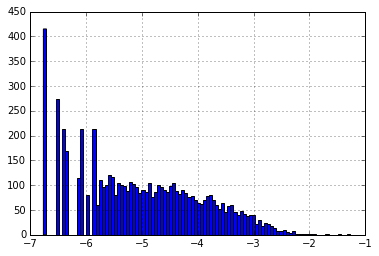

In [12]:
s.hist(bins=100)

# 注音對應表

In [13]:
import codecs

bpmf1_to_chars = defaultdict(list)
chars_to_phonic = defaultdict(str)
phonics_list = []
with codecs.open("bpmf.txt", 'r', 'utf-8') as bpmf_file:
    for line in bpmf_file:
        first_spell, count, word, full_spell = line.split("\t")
        bpmf1_to_chars[first_spell].append(word)
        chars_to_phonic[word] = first_spell
        phonics_list.append(first_spell)
phonics_list = list(set(phonics_list))

In [14]:
print chars_to_phonic[u"請"]

ㄑ


In [15]:
for i in phonics_list:
    print i

ㄅ
ㄇ
ㄆ
ㄉ
ㄈ
ㄋ
ㄊ
ㄍ
ㄌ
ㄏ
ㄎ
ㄑ
ㄐ
ㄓ
ㄒ
ㄕ
ㄔ
ㄗ
ㄖ
ㄙ
ㄘ
ㄛ
ㄚ
ㄜ
ㄟ
ㄞ
ㄡ
ㄠ
ㄣ
ㄢ
ㄤ
ㄧ
ㄦ
ㄩ
ㄨ


In [16]:
for i in bpmf1_to_chars[u'ㄨ'][:10]:
    print i

唯
玩
臥
悟
悟
無
瘟
霧
娃
襪


In [17]:
bpmf1_to_chars.keys()

[u'\u3105',
 u'\u3107',
 u'\u3106',
 u'\u3109',
 u'\u3108',
 u'\u310b',
 u'\u310a',
 u'\u310d',
 u'\u310c',
 u'\u310f',
 u'\u310e',
 u'\u3111',
 u'\u3110',
 u'\u3113',
 u'\u3112',
 u'\u3115',
 u'\u3114',
 u'\u3117',
 u'\u3116',
 u'\u3119',
 u'\u3118',
 u'\u311b',
 u'\u311a',
 u'\u311c',
 u'\u311f',
 u'\u311e',
 u'\u3121',
 u'\u3120',
 u'\u3123',
 u'\u3122',
 u'\u3124',
 u'\u3127',
 u'\u3126',
 u'\u3129',
 u'\u3128']

### 階段測試

In [18]:
bpmf1_to_chars[u'ㄨ']

[u'\u552f',
 u'\u73a9',
 u'\u81e5',
 u'\u609f',
 u'\u609f',
 u'\u7121',
 u'\u761f',
 u'\u9727',
 u'\u5a03',
 u'\u896a',
 u'\u856a',
 u'\u5c4b',
 u'\u502d',
 u'\u52d9',
 u'\u738b',
 u'\u6e2d',
 u'\u5deb',
 u'\u7f54',
 u'\u5514',
 u'\u8466',
 u'\u6211',
 u'\u6170',
 u'\u570d',
 u'\u8ac9',
 u'\u7aa9',
 u'\u8b02',
 u'\u5f4e',
 u'\u52ff',
 u'\u821e',
 u'\u6845',
 u'\u9b4f',
 u'\u8155',
 u'\u868a',
 u'\u73a9',
 u'\u754f',
 u'\u6c61',
 u'\u6664',
 u'\u507d',
 u'\u9811',
 u'\u520e',
 u'\u5e44',
 u'\u6e26',
 u'\u54c7',
 u'\u7a69',
 u'\u885b',
 u'\u6c6a',
 u'\u7aaa',
 u'\u7515',
 u'\u504e',
 u'\u671b',
 u'\u6587',
 u'\u7d08',
 u'\u7269',
 u'\u8f13',
 u'\u70f7',
 u'\u5dcd',
 u'\u805e',
 u'\u80c3',
 u'\u851a',
 u'\u6b66',
 u'\u543e',
 u'\u8c4c',
 u'\u5916',
 u'\u6587',
 u'\u6b6a',
 u'\u4f4d',
 u'\u84ca',
 u'\u6c83',
 u'\u5b8c',
 u'\u5984',
 u'\u63e1',
 u'\u8aa3',
 u'\u4e94',
 u'\u7063',
 u'\u9a16',
 u'\u8aa4',
 u'\u5371',
 u'\u8708',
 u'\u60cb',
 u'\u9055',
 u'\u7d0b',
 u'\u5a49',
 u'\u5a01',
 u'\

# viterbi

In [19]:
# Helps visualize the steps of Viterbi.
def print_dptable(V):
    print "    ",
    for i in range(len(V)):
        print "%7d" % i,
    print

    for y in V[0].keys():
        print"%.5s: " % y,
        for t in range(len(V)):
            print "%.7s" % ("%f" % V[t][y]),
        print

def viterbi(obs, states, start_p, trans_p, emit_p):
    def get_states(bpmf):
        return bpmf1_to_chars[bpmf]
    V = [{}]
    path = {}

    # Initialize base cases (t == 0)
    for y in states:
        V[0][y] = start_p[y] + emit_p[y][obs[0]]
        path[y] = [y]

    # Run Viterbi for t > 0
    for t in range(1,len(obs)):
        V.append({})
        newpath = {}
        
        for y in get_states(obs[t]):
            (prob, state) = max([(V[t-1][y0] + trans_p[y0][y] + emit_p[y][obs[t]], y0) for y0 in get_states(obs[t-1])])
            V[t][y] = prob
            newpath[y] = path[state] + [y]

        # Don't need to remember the old paths
        path = newpath

    #print_dptable(V)
    (prob, state) = max([(V[len(obs) - 1][y], y) for y in get_states(obs[-1])])
    return (prob, path[state])

In [20]:
u"書" not in phonics_list

True

In [21]:
print prob_words(u"情")
print prob_words(u"請")
print prob_words(u"七")

-2.85659578629
-3.22352961959
-3.0990646416


In [22]:
states = ('Healthy', 'Fever') #產生所有跟注音有關的字
 
observations = ("ㄑ","ㄅ","ㄨ") #輸入注音符號
 
start_probability = {'Healthy': 0.6, 'Fever': 0.4} #第一個字的機率
 
transition_probability = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
   'Fever' : {'Healthy': 0.4, 'Fever': 0.6},
   }
 
emission_probability = {
   'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1}, #注音轉中文 {國字:{注音:機率,注音:機率...}}
   'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
   }
def example():
    return viterbi(observations,
                   states,
                   start_probability,
                   transition_probability,
                   emission_probability)
prob, path = example()
print prob, path

KeyError: '\xe3\x84\x91'

自 然 語 言 處 理


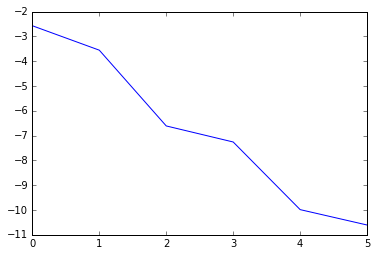

In [26]:
def bpmf1s_to_chars(spell_string):
    # phonetic to word
    phonics = ""
    for input_word in spell_string:
        if input_word not in phonics_list:
            phonics += chars_to_phonic[input_word]
        else:
            phonics += input_word
#     phonics = spell_string
    observation = tuple([pho for pho in phonics])
    #generate all chinese word correspond to the input phonics
    states = []
    for pho in phonics:
        # a list contain chinese character
        chi_ch_list = bpmf1_to_chars[pho]
        states += chi_ch_list
    
    start_probability = defaultdict(float)
    emission_probability = defaultdict(lambda: defaultdict(lambda: 0.0))
    for word in states:
        start_probability[word] = prob_words(word)
        emission_probability[word].update({chars_to_phonic[word]:1})
    
    transition_probability = defaultdict(lambda: defaultdict(lambda: 0.0))
    for text_front in states:
        for text_rear in states:
            transition_probability[text_front][text_rear] = prob_word_by_word(text_front, text_rear)
            
    prob, path = viterbi(observation, states, start_probability, transition_probability, emission_probability)
    def line_plot_object(series):
        import pandas
        %matplotlib inline
        s = pandas.Series(series)
        return s.transpose().plot()
    
    prob_path = [start_probability[path[0]]]
    for t in range(1, len(path)):
        prob_path.append(prob_path[t-1] + transition_probability[path[t-1]][path[t]] )
    line_plot_object(prob_path)
    
    return prob,path,observation,states,start_probability,transition_probability,emission_probability

#function test
for i in bpmf1s_to_chars(u'ㄗㄖㄩㄧㄔㄌ')[1]:
    print i,

### 最終測試

中 華 民 國 政 府


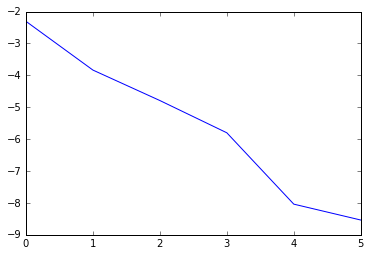

In [31]:
for i in bpmf1s_to_chars(u'ㄓㄏㄇㄍㄓㄈ')[1]:
    print i,

不 是


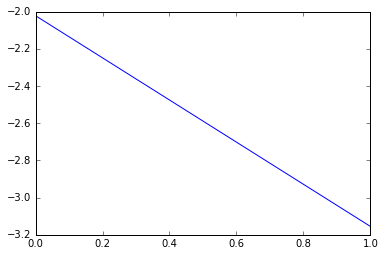

In [32]:
for i in bpmf1s_to_chars(u'ㄅㄕ')[1]:
    print i,

ㄏ
ㄉ
ㄒ
清 華 大 學


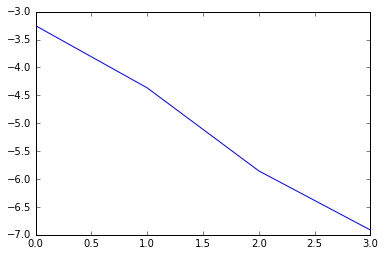

In [57]:
for i in bpmf1s_to_chars(u'ㄑㄏㄉㄒ')[1]:
    print i,

ㄒ
ㄍ
ㄔ
資 訊 工 程


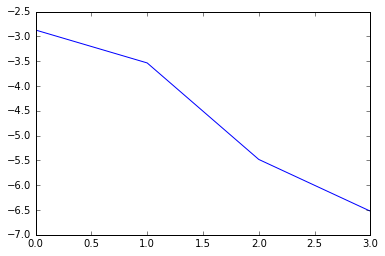

In [56]:
for i in bpmf1s_to_chars(u'ㄗㄒㄍㄔ')[1]:
    print i,

這 時 也 不 是


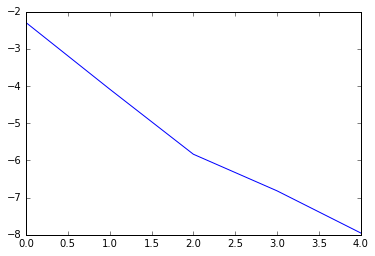

In [27]:
for i in bpmf1s_to_chars(u'ㄓㄕㄧㄅ書')[1]:
    print i,

立 法 委 員 的 造 成 績


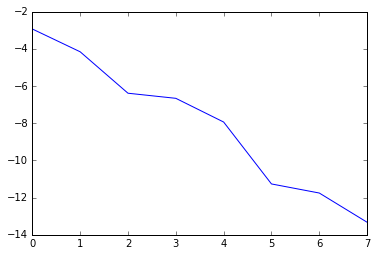

In [28]:
for i in bpmf1s_to_chars(u'ㄌㄈㄨㄩㄉㄗㄔ架')[1]:
    print i,

外 銷 售 價


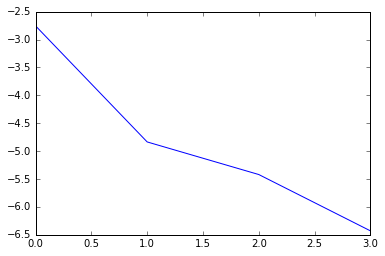

In [29]:
for i in bpmf1s_to_chars(u'ㄨㄒ睡ㄐ')[1]:
    print i,

(-22.126938628228288,
 [u'肚',
  u'子',
  u'很',
  u'餓',
  u'，',
  u'快',
  u'點',
  u'下',
  u'課'],
 <matplotlib.axes.AxesSubplot object at 0x113a7ffd0>)


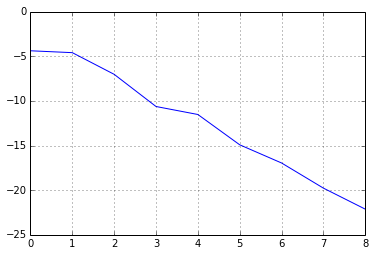

In [34]:
bpmf1s_to_chars(u'肚ㄗㄏㄜ，ㄎ點下ㄎ')